In [1]:
import pandas as pd

## Using Pandas Pipe function

In [2]:
def load_data(path):
    return pd.read_csv(path)


def data_cleaning(data):
    data = data.drop_duplicates()
    data = data.dropna()
    data = data.reset_index(drop=True)
    return data


def convert_dtypes(data, types_dict=None):
    data = data.astype(dtype=types_dict)
    ## convert the date column to datetime
    data["Date"] = pd.to_datetime(data["Date"])
    return data


def data_analysis(data):
    data["month"] = data["Date"].dt.month
    new_df = data.groupby("month")["Units Sold"].mean()
    return new_df


def data_visualization(new_df, vis_type="bar"):
    new_df.plot(kind=vis_type, figsize=(10, 5), title="Average Units Sold by Month")
    return new_df


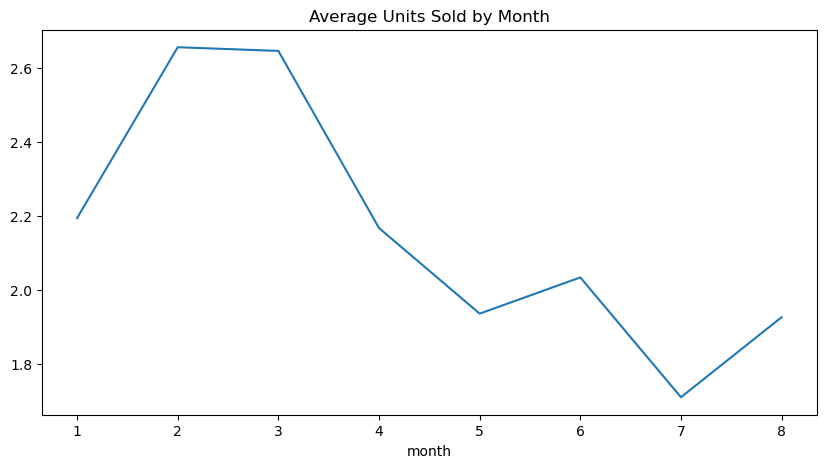

In [3]:
path = "Online Sales Data.csv"
df = (
    pd.DataFrame()
    .pipe(lambda x: load_data(path))
    .pipe(data_cleaning)
    .pipe(convert_dtypes, {"Product Category": "str", "Product Name": "str"})
    .pipe(data_analysis)
    .pipe(data_visualization, "line")
)


## Using Prefect for building data pipelines

In [4]:
%pip install prefect -q

  Using cached exceptiongroup-1.2.2-py3-none-any.whl.metadata (6.6 kB)
  Using cached anyio-4.4.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached httpcore-1.0.5-py3-none-any.whl.metadata (20 kB)
  Using cached Mako-1.3.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached tzlocal-5.2-py3-none-any.whl.metadata (7.8 kB)
  Using cached email_validator-2.2.0-py3-none-any.whl.metadata (25 kB)
  Using cached dnspython-2.6.1-py3-none-any.whl.metadata (5.8 kB)
   ---------------------------------------- 0.0/6.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.8/6.0 MB 1.5 MB/s eta 0:00:04
   -------- ------------------------------- 1.3/6.0 MB 1.7 MB/s eta 0:00:03
   ------------- -------------------------- 2.

In [8]:
import pandas as pd
from prefect import task, flow


@task
def load_data(path):
    return pd.read_csv(path)


@task
def data_cleaning(data):
    data = data.drop_duplicates()
    data = data.dropna()
    data = data.reset_index(drop=True)
    return data


@task
def convert_dtypes(data, types_dict=None):
    data = data.astype(dtype=types_dict)
    data["Date"] = pd.to_datetime(data["Date"])
    return data


@task
def data_analysis(data):
    data["month"] = data["Date"].dt.month
    new_df = data.groupby("month")["Units Sold"].mean()
    return new_df


@task
def data_visualization(new_df, vis_type="bar"):
    import matplotlib.pyplot as plt

    new_df.plot(kind=vis_type, figsize=(10, 5), title="Average Units Sold by Month")
    plt.savefig("average_units_sold_by_month.png")
    return new_df




14:18:48.649 | INFO    | prefect.engine - Created flow run 'enlightened-dingo' for flow 'Data Pipeline'

14:18:48.816 | INFO    | Flow run 'enlightened-dingo' - Created task run 'load_data-0' for task 'load_data'

14:18:48.822 | INFO    | Flow run 'enlightened-dingo' - Executing 'load_data-0' immediately...

14:18:48.990 | INFO    | Task run 'load_data-0' - Finished in state Completed()

14:18:49.052 | INFO    | Flow run 'enlightened-dingo' - Created task run 'data_cleaning-0' for task 'data_cleaning'

14:18:49.053 | INFO    | Flow run 'enlightened-dingo' - Executing 'data_cleaning-0' immediately...

14:18:49.226 | INFO    | Task run 'data_cleaning-0' - Finished in state Completed()

14:18:49.283 | INFO    | Flow run 'enlightened-dingo' - Created task run 'convert_dtypes-0' for task 'convert_dtypes'

14:18:49.288 | INFO    | Flow run 'enlightened-dingo' - Executing 'convert_dtypes-0' immediately...

14:18:49.441 | INFO    | Task run 'convert_dtypes-0' - Finished in state Completed()

14:18:49.506 | INFO    | Flow run 'enlightened-dingo' - Created task run 'data_analysis-0' for task 'data_analysis'

14:18:49.510 | INFO    | Flow run 'enlightened-dingo' - Executing 'data_analysis-0' immediately...

14:18:49.684 | INFO    | Task run 'data_analysis-0' - Finished in state Completed()

14:18:49.753 | INFO    | Flow run 'enlightened-dingo' - Created task run 'data_visualization-0' for task 'data_visualization'

14:18:49.760 | INFO    | Flow run 'enlightened-dingo' - Executing 'data_visualization-0' immediately...

14:18:50.087 | INFO    | Task run 'data_visualization-0' - Finished in state Completed()

14:18:50.144 | INFO    | Flow run 'enlightened-dingo' - Finished in state Completed()

month
1    2.193548
2    2.655172
3    2.645161
4    2.166667
5    1.935484
6    2.033333
7    1.709677
8    1.925926
Name: Units Sold, dtype: float64


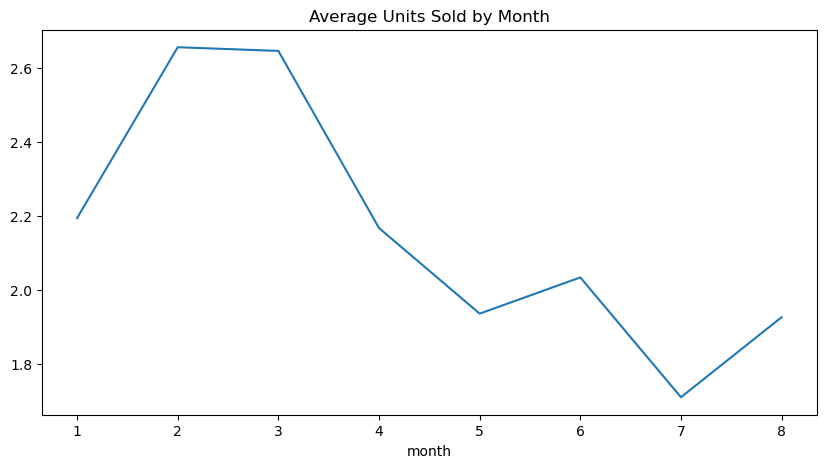

In [10]:
@flow(name="Data Pipeline")
def data_pipeline(path: str):
    df = load_data(path)
    df_cleaned = data_cleaning(df)
    df_converted = convert_dtypes(
        df_cleaned, {"Product Category": "str", "Product Name": "str"}
    )
    analysis_result = data_analysis(df_converted)
    new_df = data_visualization(analysis_result, "line")
    return new_df


# Run the flow!
if __name__ == "__main__":
    new_df = data_pipeline("Online Sales Data.csv")
    print(new_df)
